In [4]:
# For playing with dataframe and doing mathematical calculations. 
import pandas as pd 
import numpy as np 

# For Warnings
import warnings 
warnings.filterwarnings('ignore')

# For Data Visualization.
import matplotlib.pyplot as plt 
import seaborn as sns 

# For Setting Options.
pd.set_option('display.max_rows' , None)
pd.set_option('display.max_columns' , None)


data = pd.read_csv('chicago_crime_dataset.csv')
        

In [5]:
data.info()  # Get additional information about the dataset.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7846809 entries, 0 to 7846808
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

In [6]:
data.describe() # Get statistical information about dataset. 

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,7.846809e+06,7.846809e+06,7.846762e+06,7.231960e+06,7.233333e+06,7.758698e+06,7.758698e+06,7.846809e+06,7.758698e+06,7.758698e+06
mean,7.074220e+06,1.185677e+03,1.129493e+01,2.275683e+01,3.747487e+01,1.164606e+06,1.885794e+06,2.010047e+03,4.184221e+01,-8.767147e+01
std,3.530056e+06,7.032093e+02,6.953759e+00,1.385113e+01,2.154184e+01,1.684276e+04,3.227139e+04,6.341715e+00,8.878488e-02,6.107057e-02
min,6.340000e+02,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.001000e+03,3.661945e+01,-9.168657e+01
25%,3.815790e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152985e+06,1.859077e+06,2.005000e+03,4.176873e+01,-8.771365e+01
50%,7.075819e+06,1.034000e+03,1.000000e+01,2.300000e+01,3.200000e+01,1.166121e+06,1.890736e+06,2.009000e+03,4.185593e+01,-8.766582e+01
75%,1.021223e+07,1.731000e+03,1.700000e+01,3.400000e+01,5.700000e+01,1.176384e+06,1.909282e+06,2.015000e+03,4.190680e+01,-8.762817e+01
max,1.314808e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951622e+06,2.023000e+03,4.202291e+01,-8.752453e+01


In [7]:
# Number of Unique Case Number.

print(f"Out of {len(data)}: {len(data['Case Number'].unique())} are unique case numbers")  

Out of 7846809: 7846260 are unique case numbers


##### Most case numbers are unique case numbers. 

In [8]:
# Out of all cases , how many are non_unique cases ? 

non_unique_case_number = data[data.duplicated('Case Number') | data.duplicated('Case Number', keep=False)]['Case Number'].tolist() 

print(f"Length of non_unique: {len(non_unique_case_number)} out of {len(data)}")

Length of non_unique: 1007 out of 7846809


In [9]:
non_unique_case_number_df = data[data.duplicated('Case Number', keep=False)]
non_unique_case_number_df.head() # Saving non_unique case number dataframe for future use.

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
46926,26687,JF198311,04/05/2022 03:45:00 PM,113XX S GREEN ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,2234,22.0,21.0,75.0,01A,1172680.0,1829692.0,2022,07/18/2023 04:49:44 PM,41.688105,-87.643459,"(41.688105474, -87.643459236)"
46929,26688,JF198311,04/05/2022 03:45:00 PM,113XX S GREEN ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,2234,22.0,21.0,75.0,01A,1172680.0,1829692.0,2022,07/18/2023 04:49:44 PM,41.688105,-87.643459,"(41.688105474, -87.643459236)"
46931,26689,JF198311,04/05/2022 03:45:00 PM,113XX S GREEN ST,0110,HOMICIDE,FIRST DEGREE MURDER,HOUSE,False,False,2234,22.0,21.0,75.0,01A,1172680.0,1829692.0,2022,07/18/2023 04:49:44 PM,41.688105,-87.643459,"(41.688105474, -87.643459236)"
73305,27607,JG325333,07/03/2023 02:03:00 AM,026XX S MILLARD AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,True,1032,10.0,22.0,30.0,01A,1152462.0,1886281.0,2023,07/10/2023 04:48:21 PM,41.843815,-87.715989,"(41.843815291, -87.715989472)"
76410,27606,JG325333,07/03/2023 12:44:00 AM,026XX S MILLARD AVE,0110,HOMICIDE,FIRST DEGREE MURDER,APARTMENT,True,True,1032,10.0,22.0,30.0,01A,1152462.0,1886281.0,2023,07/10/2023 04:48:21 PM,41.843815,-87.715989,"(41.843815291, -87.715989472)"


#### Observation 
<b>
    <i>1. There are 7846260 unique values of case number out of 7846809 , it means there are 7846260 cases registered with a single crime the rest 1007 are the case numbers which have commited multiple crimes ? <br>
    2. 1007 are non unique case numbers. <br>
    </i>
</b>

In [10]:
df = data.copy() # Creating a copy of dataframe "data" as "df".

In [11]:
# Function to convert Date from "DD/MM/YYYY HH:MM:SS" to "DD/MM/YYYY"

def date_column(df) : 
    date_list = []
    for i in df['Date'] : 
        date_spliter = i.split()[0]
        date_list.append(date_spliter)
    return date_list
date_column(df)  


df['date'] = date_column(df) 

In [12]:
# Top 10 - Number of cases each day? 

top_10_num_of_cases_each_day = df.groupby(['date'])['Case Number'].count().reset_index(name = 'no_of_cases').set_index('no_of_cases').sort_index(ascending = False)[:10]
top_10_num_of_cases_each_day

,date
no_of_cases,
2033,01/01/2003
1978,01/01/2005
1963,01/01/2007
1919,01/01/2006
1899,05/31/2020
1897,01/01/2004
1873,01/01/2002
1844,01/01/2009
1825,01/01/2001


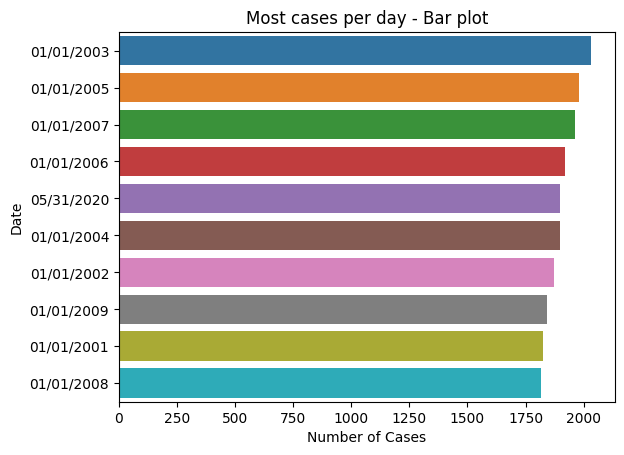

In [13]:
top_10_num_of_cases_each_day_df = pd.DataFrame(top_10_num_of_cases_each_day)
index_df = top_10_num_of_cases_each_day_df.index

sns.barplot(x = index_df , y = 'date' , data = top_10_num_of_cases_each_day_df)
plt.title("Most cases per day - Bar plot")
plt.xlabel("Number of Cases")
plt.ylabel("Date")
plt.show()

#### Observation 
<b>
    <i>
        1. The average Number of cases per day could be more than 1700. 
    </i>
</b>

In [14]:
# Most appeared block address ? 

df.groupby(['Block' , 'Case Number'])['Block'].count().reset_index(name = 'Number of times the address appears').set_index('Number of times the address appears').sort_index(ascending = False)[:10]

,Block,Case Number
Number of times the address appears,,
6,039XX S WALLACE ST,HJ590004
6,057XX S CALIFORNIA AVE,HZ140230
5,067XX W IRVING PARK RD,JC470284
5,076XX S RHODES AVE,HP296582
5,072XX S MOZART ST,HS256531
5,062XX S MORGAN ST,JE266473
4,061XX S KILDARE AVE,HS496074
4,080XX S MICHIGAN AVE,HJ104730
4,027XX E 75TH ST,JA206252


In [15]:
no_of_address_appears = df.groupby(['Block' , 'Case Number'])['Block'].count().reset_index(name = 'Number of times the address appears').set_index('Number of times the address appears').sort_index(ascending = False)[:10].index
block_address = df.groupby(['Block' , 'Case Number'])['Block'].count().reset_index(name = 'Number of times the address appears').set_index('Number of times the address appears').sort_index(ascending = False)['Block'].values[:10]

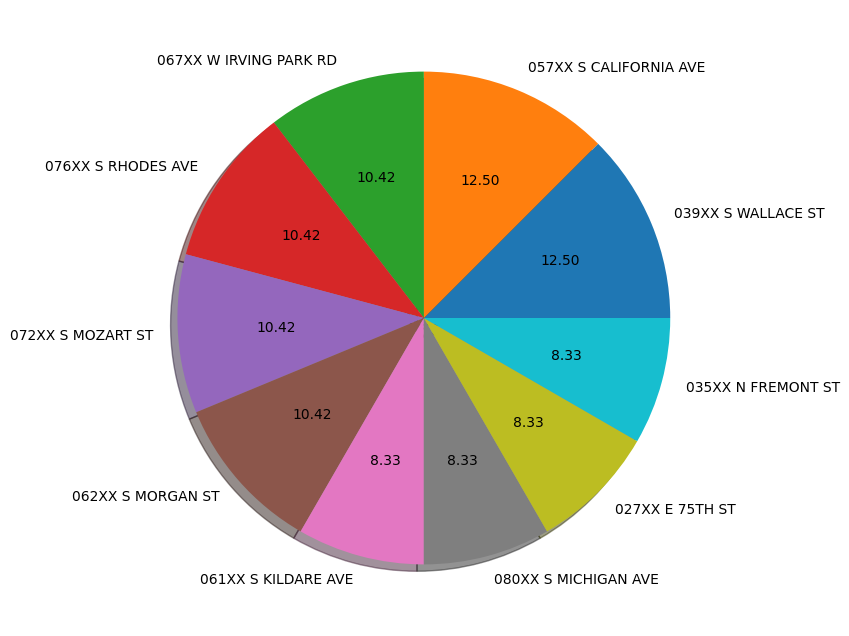

In [16]:
plt.figure(figsize = (10,8))
plt.pie(no_of_address_appears , labels = block_address , autopct = '%0.2f' , shadow = True)
plt.show()

In [17]:
df['Primary Type'].value_counts()[:10]

Primary Type
THEFT                  1655523
BATTERY                1433696
CRIMINAL DAMAGE         894469
NARCOTICS               748757
ASSAULT                 512777
OTHER OFFENSE           487246
BURGLARY                426115
MOTOR VEHICLE THEFT     382245
DECEPTIVE PRACTICE      349195
ROBBERY                 294608
Name: count, dtype: int64

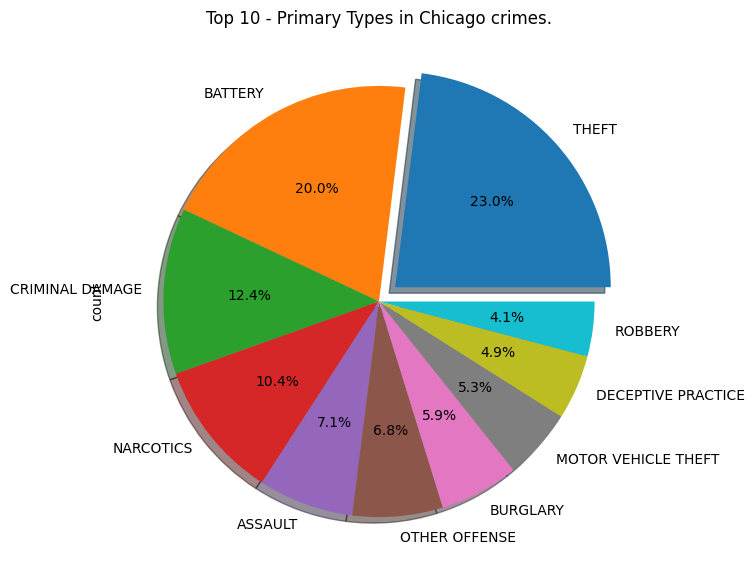

In [18]:
top_10_primary_types = df['Primary Type'].value_counts()[:10].plot(kind = 'pie' , autopct = "%1.1f%%" ,  shadow = True , explode = [0.1,0,0,0,0,0,0,0,0,0])
plt.title("Top 10 - Primary Types in Chicago crimes.")
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.show()

##### Observation: 

<b>
    <i> 
       1. "Theft" with 1655523 followed by "Battery" with 1433696 and "Criminal Damage" with 894469 are the most common types of crimes over the years. <br> 
       2. 039XX S WALLACE ST,057XX S CALIFORNIA AVE ,067XX W IRVING PARK RD are the three most commonly appeared address for crimes with 6 , 6 and 5 times to be exact. <br>        
    </i>
        
    
</b> 

In [19]:
# Out of total case registered how many are arrested and how many are not? 


arrested = df['Arrest'].where(df['Arrest'] == True).count()
not_arrested = df['Arrest'].where(df['Arrest'] != True).count()

print(f"Out of {len(df)},\n{arrested} are Arrested and \n{not_arrested} are not Arrested.")


Out of 7846809,
2042242 are Arrested and 
5804567 are not Arrested.


<b> Out of total cases , 26 % of Criminals are arrested . 

In [ ]:
df['date'] = pd.to_datetime(df['date'])  # Convert date to DateTime64 [ns]. 

monthly_crime_count = df.resample("M"  , on = 'date').size()

# Create a line plot. 

plt.figure(figsize = (10,6))
plt.plot(monthly_crime_count.index , monthly_crime_count.values , marker = 'o')
plt.xlabel("Date")
plt.ylabel("Number of crime incidents")
plt.title("Monthly Crime Trends in Chicago")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()


##### Observation : 

<b> <i> 
    1.The crime rate is dropping overall. <br> 
    2.In 2000s,number of crime incidents were close to 40k. <br> 
    3.In 2024 ,it's estimate to be 10k , so it's a major drop in crime. <br>
    </i> 
</b> 

In [ ]:
# Extract month and year from 'date' col. 
df['month'] = df['date'].dt.month

# group data by month and count incidents 
monthly_crime_count = df.groupby('month').size()

# Define months 

month_names = [
    'January','February','March','April','May','June','July','August','September','October',
    'November','December']


# Bar plot - seasonality analysis 

plt.figure(figsize = (10,6))
monthly_crime_count.plot(kind = 'bar')
plt.xlabel("Month")
plt.ylabel("Number of Crime Incidents")
plt.title("Monthly Seasonality Analysis")
plt.xticks(range(12) , month_names , rotation = 45)
plt.tight_layout()
plt.show()

In [ ]:
# Day of week analysis 

# Extract day of the week from 'date' column (0 = Monday , 6 = Sunday)
df['DayofWeek'] = df['date'].dt.dayofweek

# Group data by day of the week and count incidents 
day_of_week_crime_count = df.groupby('DayofWeek').size()

# Define day names for labeling 
day_names = ['Monday' , 'Tuesday' , 'Wednesday' , 'Thursday' , 'Friday' , 'Saturday', 'Sunday']

# Bar plot - day of the week . 

plt.figure(figsize = (10,6))
day_of_week_crime_count.plot(kind = "bar")
plt.xlabel("Day of the week")
plt.ylabel("Number of Crime Incidents")
plt.title("Day-of-week Analysis")
plt.xticks(range(7) , day_names , rotation = 45)
plt.tight_layout()
plt.show()

##### Observation : 

<b> 
    <i>
        1. May , June , july and august are the months with most crime activities.<br>
        2. Whereas Wednesday , Friday and Saturday can be said as most crime days in a week. <br></i>
    
</b>